Project 2: Ames Housing Data and Kaggle Challenge

Problem Statement:
    To create a regression model to predict the sales price for each house

In [1]:
import random as rand
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import imp
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn import feature_extraction 
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
ames_train = pd.read_csv('datasets/train.csv')

In [3]:
#exploring the dataset
def explore(df):
    print(df.shape)
    print("")
    print(df.head())
    print("")
    print(df.dtypes)
    print("")
    print(df.isnull().sum())
    print("")
    print(df.describe())
    
explore(ames_train)

(2051, 81)

    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual 

In [4]:
ames_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

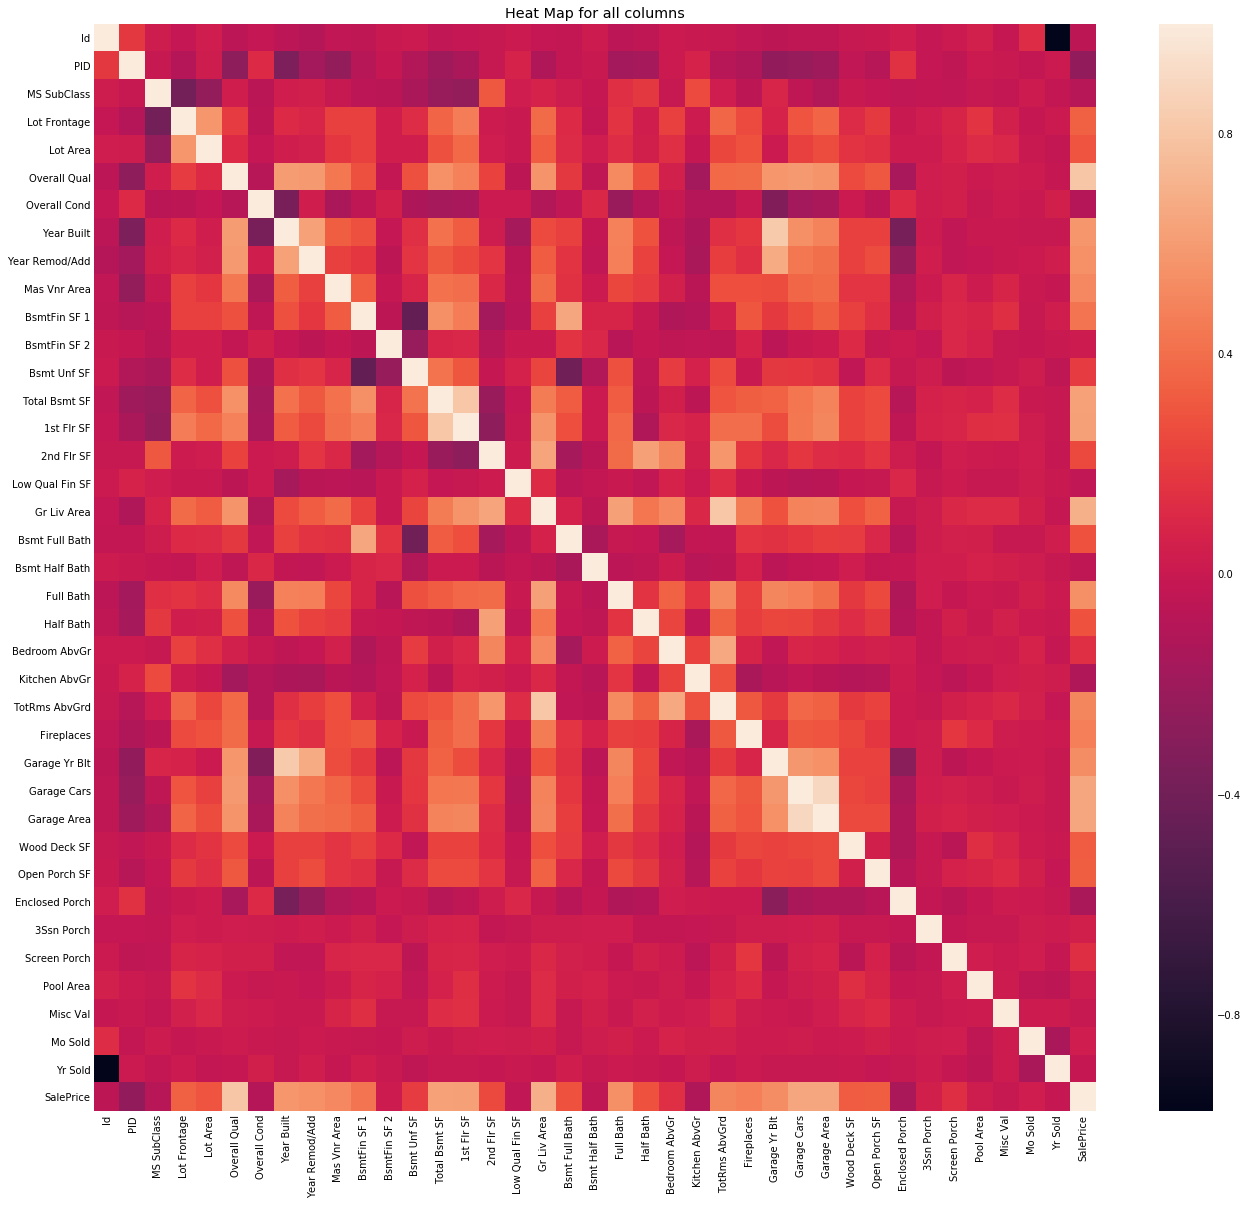

In [4]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(ames_train.corr(), ax = ax, annot=False, annot_kws={"size": 20})

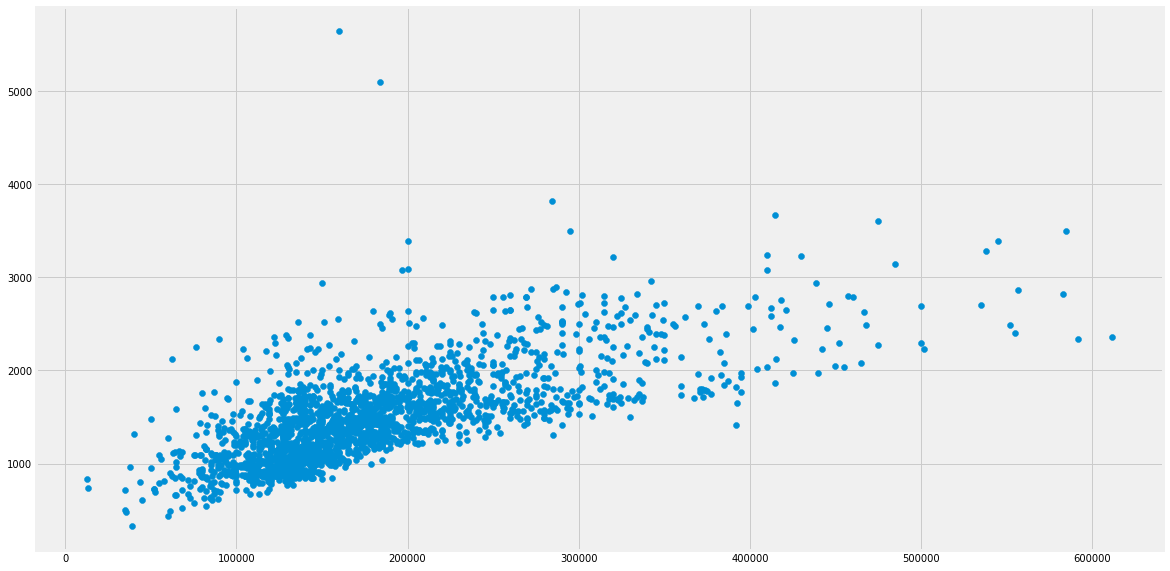

In [5]:
figure(figsize=(18, 10))
plt.scatter(ames_train['SalePrice'],ames_train['Gr Liv Area'])
#remove the two outliers at the top with high living area but seemingly unexpensive

In [6]:
ames_train[ames_train['Gr Liv Area']>5000]
#locate the rows to drop (row 960,1885)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


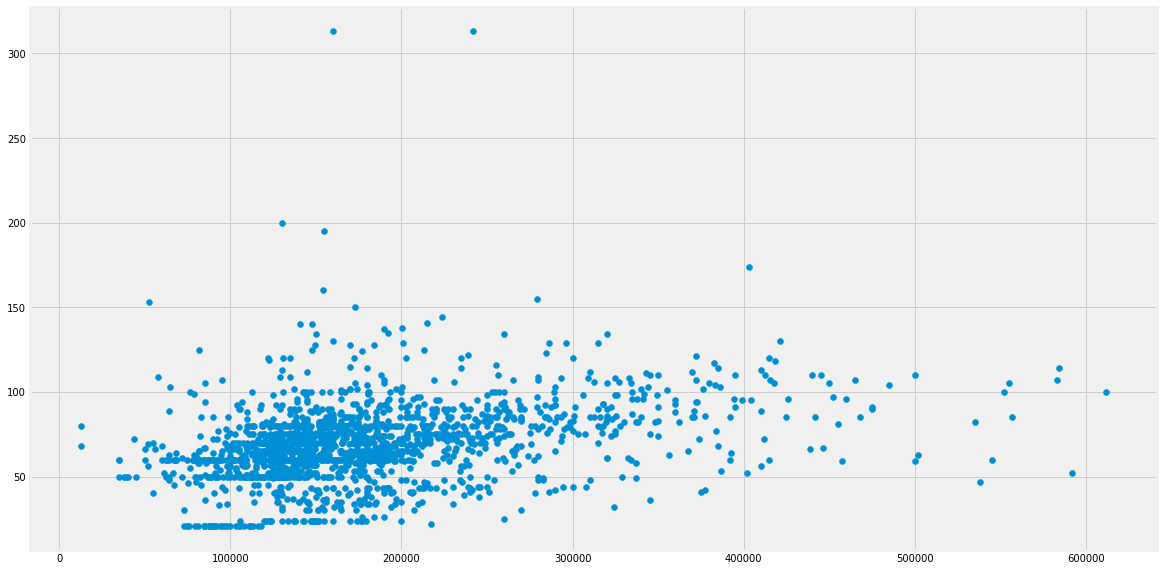

In [7]:
figure(figsize=(18, 10))
plt.scatter(ames_train['SalePrice'],ames_train['Lot Frontage'])
#remove the two outliers at the top with high lot frontage

In [8]:
ames_train[ames_train['Lot Frontage']>300]
#locate the rows to drop (row 1335)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,242000


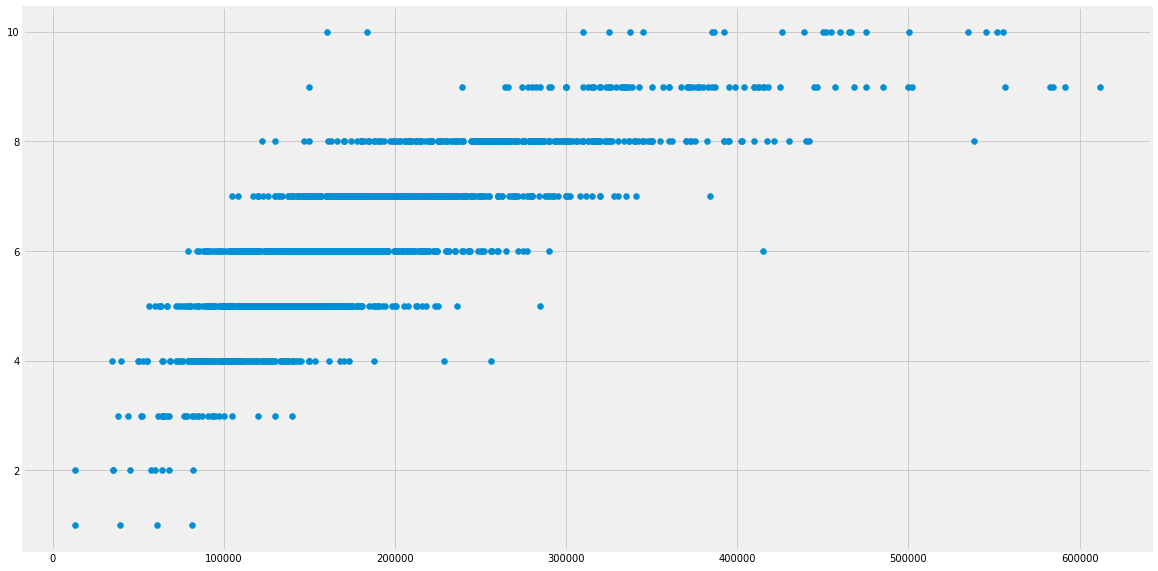

In [9]:
figure(figsize=(18, 10))
plt.scatter(ames_train['SalePrice'],ames_train['Overall Qual'])
#remove the two outliers at the top with high quality but not as high sale price

In [10]:
ames_train[(ames_train['SalePrice']<300000) & (ames_train['Overall Qual'] == 10)]
#same rows 960 and 1885

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


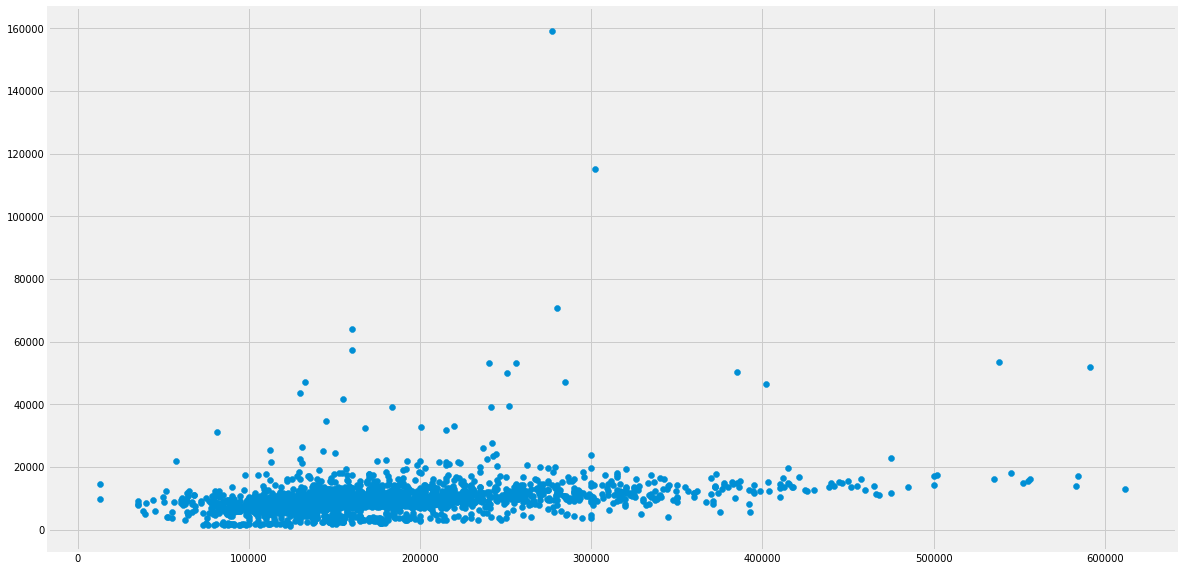

In [11]:
figure(figsize=(18, 10))
plt.scatter(ames_train['SalePrice'],ames_train['Lot Area'])
#remove the two outliers at the top with high lot frontage

In [12]:
ames_train[ames_train['Lot Area']>100000]
#locate the rows to drop (row 471,694)
#ames_train.drop(ames_train.index[471,694])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


In [13]:
ames_train = ames_train.drop(ames_train.index[[471, 694, 960,1335, 1885]])

In [14]:
ames_train.shape

(2046, 81)

In [15]:
#There are 328 entries with Lot Frontage being null and it is closely related to the SalePrice.
#Hence we will try to predict the Lot Frontage using SalePrice and Lot Area

LF = ames_train[~ames_train['Lot Frontage'].isnull()]
LF_null = ames_train[ames_train['Lot Frontage'].isnull()]
LF_null.shape

(328, 81)

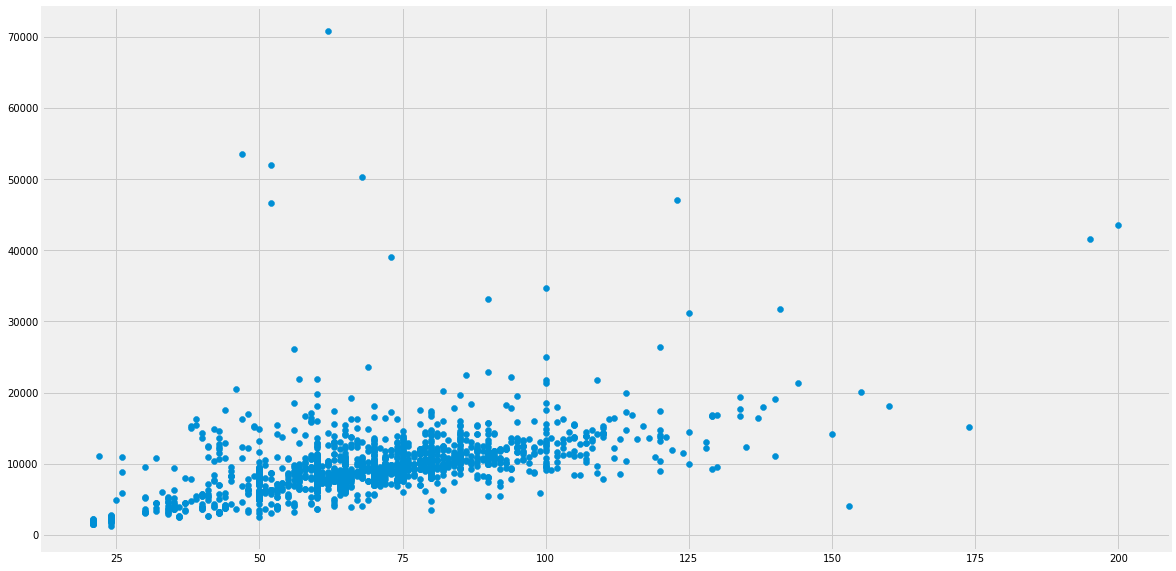

In [16]:
figure(figsize=(18, 10))
plt.scatter(ames_train['Lot Frontage'],ames_train['Lot Area'])
#Next best correlated variable

In [17]:
linreg = LinearRegression()
X = LF[['SalePrice','Lot Area']]
y = LF['Lot Frontage']
X_test = LF_null[['SalePrice','Lot Area']]

In [18]:
model = linreg.fit(X,y)

In [19]:
y_pred_lf = model.predict(X_test)
y_pred_lf = pd.DataFrame(y_pred_lf, columns = ['Lot Frontage 2'])

In [20]:
LF_null = LF_null.reset_index(drop=True)
y_pred_lf2 = pd.concat([LF_null['Id'],y_pred_lf], axis=1,join ='outer')

In [21]:
ames_train = ames_train.merge(y_pred_lf2,on='Id',how='outer')

In [22]:
ames_train['Lot Frontage'] = ames_train[['Lot Frontage','Lot Frontage 2']].max(axis=1)

In [23]:
ames_train = ames_train.drop(['Lot Frontage 2'], axis = 1)

In [24]:
#Replacing the np.nan cells to their respective column values

#Changing to NA for no alley access
ames_train['Alley'] = ames_train['Alley'].replace({np.nan:'NA'})

#both 'Mas Vnr Type' and 'Mas Vnr Area' are 22 entries that are tied to each other
ames_train['Mas Vnr Type'] = ames_train['Mas Vnr Type'].replace({np.nan:'None'})
ames_train['Mas Vnr Area'] = ames_train['Mas Vnr Area'].replace({np.nan:0})

#55 entries without basement
ames_train['Bsmt Qual'] = ames_train['Bsmt Qual'].replace({np.nan:'NA'})
ames_train['Bsmt Cond'] = ames_train['Bsmt Cond'].replace({np.nan:'NA'})

#These three cells has a basement but their exposure is unknown
ames_train.iloc[1456, ames_train.columns.get_loc('Bsmt Exposure')] = 'No'
ames_train.iloc[1547, ames_train.columns.get_loc('Bsmt Exposure')] = 'No'
ames_train.iloc[1997, ames_train.columns.get_loc('Bsmt Exposure')] = 'No'

#entries without basement
ames_train['Bsmt Exposure'] = ames_train['Bsmt Exposure'].replace({np.nan:'NA'})
ames_train['BsmtFin Type 1'] = ames_train['BsmtFin Type 1'].replace({np.nan:'NA'})
ames_train['BsmtFin SF 1'] = ames_train['BsmtFin SF 1'].replace({np.nan:0})
ames_train['BsmtFin Type 2'] = ames_train['BsmtFin Type 2'].replace({np.nan:'NA'})
ames_train['BsmtFin SF 2'] = ames_train['BsmtFin SF 2'].replace({np.nan:0})
ames_train['Bsmt Unf SF'] = ames_train['Bsmt Unf SF'].replace({np.nan:0})
ames_train['Total Bsmt SF'] = ames_train['Total Bsmt SF'].replace({np.nan:0})
ames_train['Bsmt Full Bath'] = ames_train['Bsmt Full Bath'].replace({np.nan:0})
ames_train['Bsmt Half Bath'] = ames_train['Bsmt Half Bath'].replace({np.nan:0})

#All fireplace Qu with np.nan is does not have a fireplace.
ames_train['Fireplace Qu'] = ames_train['Fireplace Qu'].replace({np.nan:'NA'})

#All except for row1712, does not have a garage. 
ames_train['Garage Type'] = ames_train['Garage Type'].replace({np.nan:'NA'})
ames_train.iloc[1712, ames_train.columns.get_loc('Garage Yr Blt')] = ames_train.iloc[1712, ames_train.columns.get_loc('Year Built')]
ames_train['Garage Yr Blt'] = ames_train['Garage Yr Blt'].replace({np.nan:0})
ames_train['Garage Finish'] = ames_train['Garage Finish'].replace({np.nan:'NA'})
ames_train['Garage Cars'] = ames_train['Garage Cars'].replace({np.nan:0})
ames_train['Garage Area'] = ames_train['Garage Area'].replace({np.nan:0})
ames_train['Garage Qual'] = ames_train['Garage Qual'].replace({np.nan:'NA'})
ames_train['Garage Cond'] = ames_train['Garage Cond'].replace({np.nan:'NA'})

#All Pool QC with np.nan has pool area of 0
ames_train['Pool QC'] = ames_train['Pool QC'].replace({np.nan:'NA'})
ames_train['Fence'] = ames_train['Fence'].replace({np.nan:'NA'})
ames_train['Misc Feature'] = ames_train['Misc Feature'].replace({np.nan:'NA'})

In [25]:
#encoding each ordinal categorical features, full glossary in readme
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


def transform(col):
    for i in col:
        le.fit(ames_train[i])
        list(le.classes_)
        ames_train[i] = le.transform(ames_train[i])

columns = ['Lot Shape',
           'Utilities',
           'Land Slope',
           'Exter Qual',
           'Exter Cond',
           'Bsmt Qual',
           'Bsmt Cond',
           'Bsmt Exposure',
           'BsmtFin Type 1',
           'BsmtFin Type 2',
           'Heating QC',
           'Electrical',
           'Kitchen Qual',
           'Functional',
           'Fireplace Qu',
           'Garage Finish',
           'Garage Qual',
           'Garage Cond',
           'Paved Drive',
           'Pool QC',
           'Fence']

transform(columns)

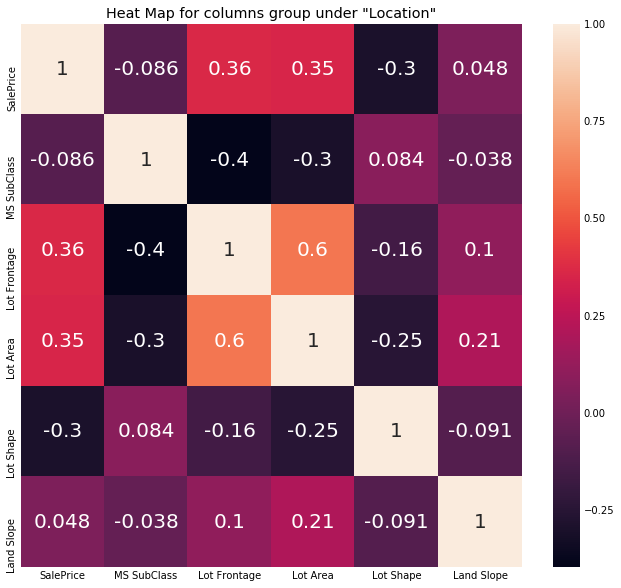

In [26]:
#to find out the general correlation between variables first, based on Location
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Heat Map for columns group under "Location"')
sns.heatmap(ames_train[['SalePrice','MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
                        'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope','Neighborhood',
                        'Condition 1','Condition 2']].corr(), ax = ax, annot=True, annot_kws={"size": 20})

#select 'lot shape' and 'lot area' to do feature engineering

In [27]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [28]:
location = ames_train[['Lot Area','Lot Shape']]
location.shape

(2046, 2)

In [29]:
location_poly = poly.fit_transform(location)
location_poly = pd.DataFrame(location_poly, columns = poly.get_feature_names(location.columns))

In [30]:
location_poly['SalePrice']=ames_train['SalePrice']

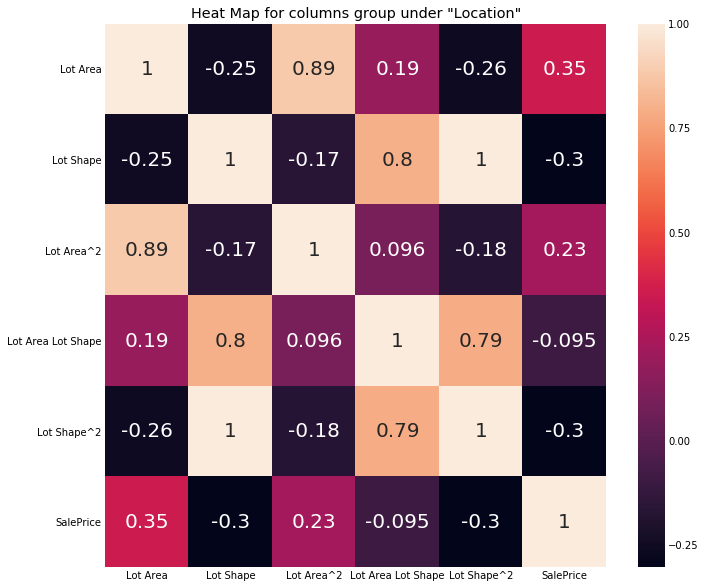

In [31]:
#check again if there are any additional features to add
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Heat Map for columns group under "Location"')
sns.heatmap(location_poly.corr(), ax = ax, annot=True, annot_kws={"size": 20})

#Conclusion: no useable features here

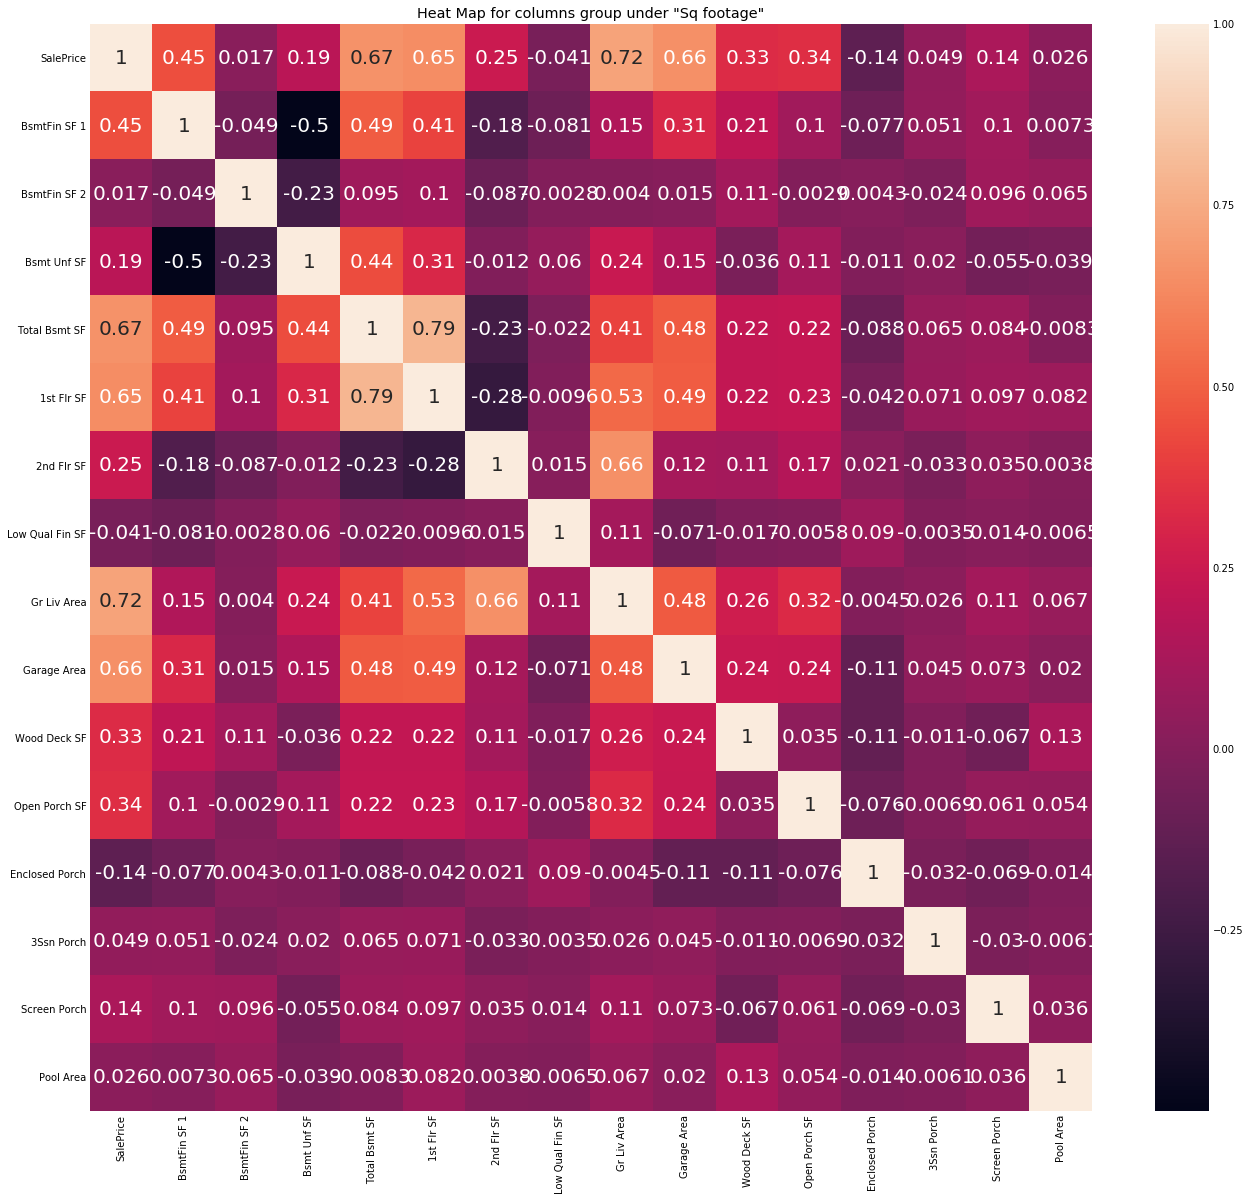

In [32]:
#to find out the general correlation between variables first, Sq footage
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Sq footage"')
sns.heatmap(ames_train[['SalePrice','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                        'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF','Open Porch SF',
                        'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area']].corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

#Use Total Bsmt SF, 1st Flr SF, Gr Liv Area, Garage Area for feature engineering

In [33]:
area = ames_train[['Total Bsmt SF', '1st Flr SF','Gr Liv Area', 'Garage Area']]
area.shape

(2046, 4)

In [34]:
area_poly = poly.fit_transform(area)
area_poly = pd.DataFrame(area_poly, columns = poly.get_feature_names(area.columns))

In [35]:
area_poly['SalePrice']=ames_train['SalePrice']
area_poly['Total Sq']= ames_train['Total Bsmt SF']+ames_train['1st Flr SF']+ames_train['Gr Liv Area']+ames_train['Garage Area']

#Added a new feature to add all square foot together

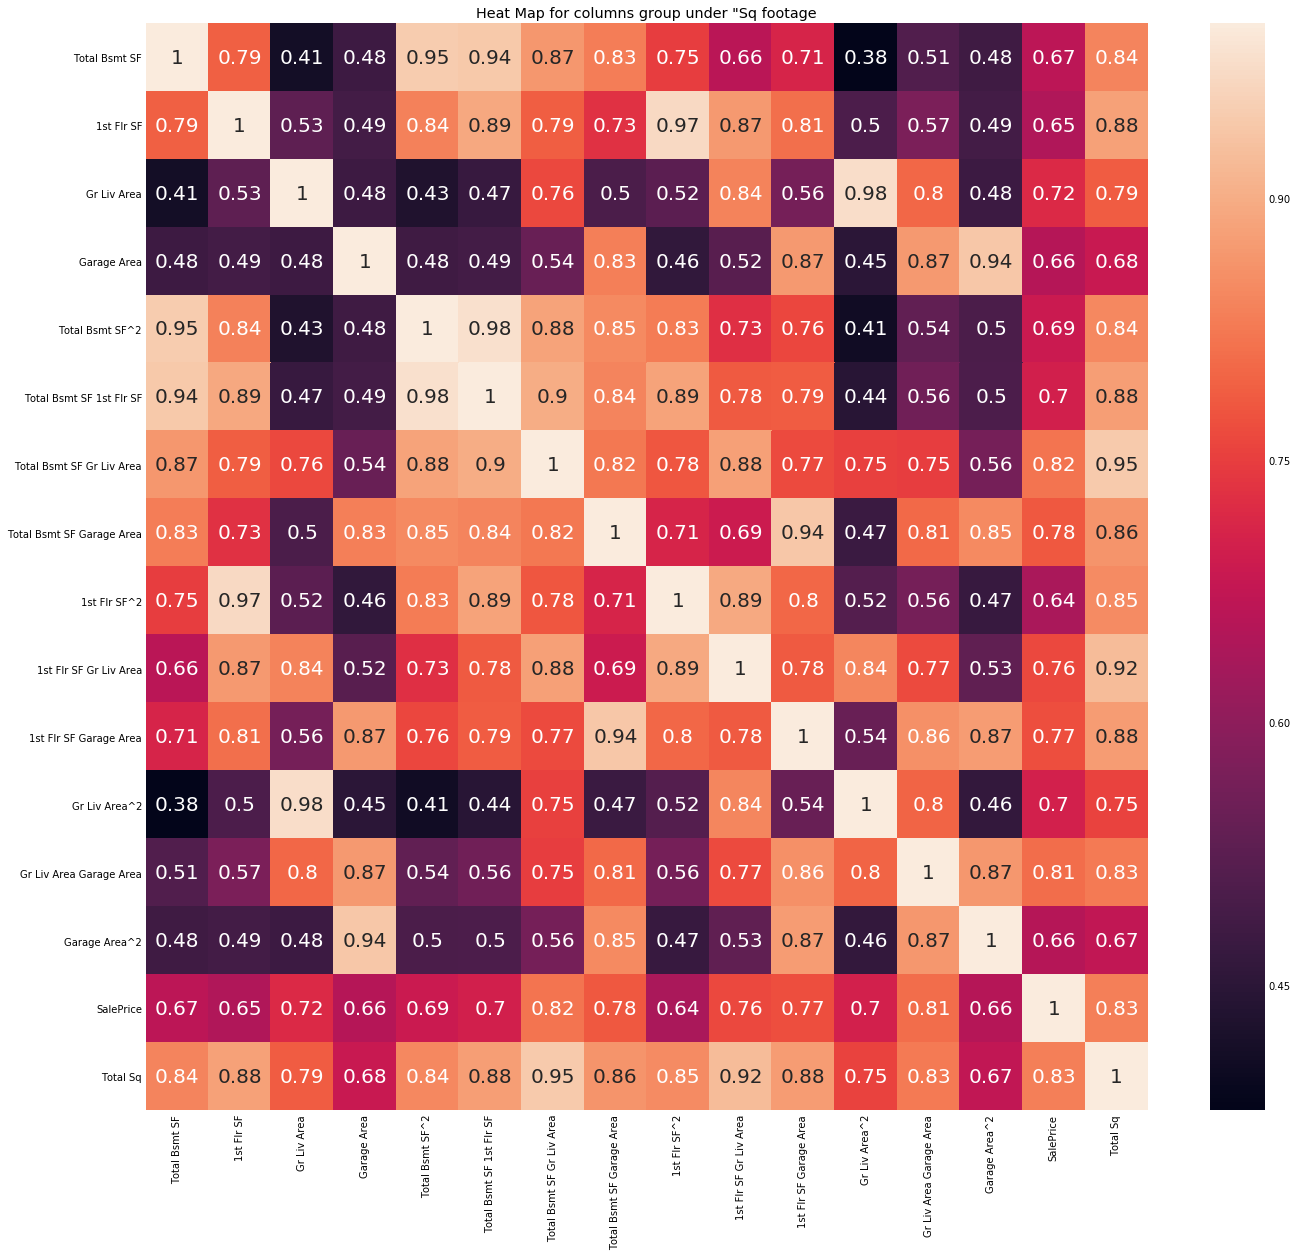

In [36]:
#check again if there are any additional features to add
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Sq footage')
sns.heatmap(area_poly.corr(), ax = ax, annot=True, annot_kws={"size": 20})

#Conclusion: Keep 'Gr Liv Area'
#Include: '1st Flr SF Garage Area', 'Gr Liv Area Garage Area', 'Total Sq'

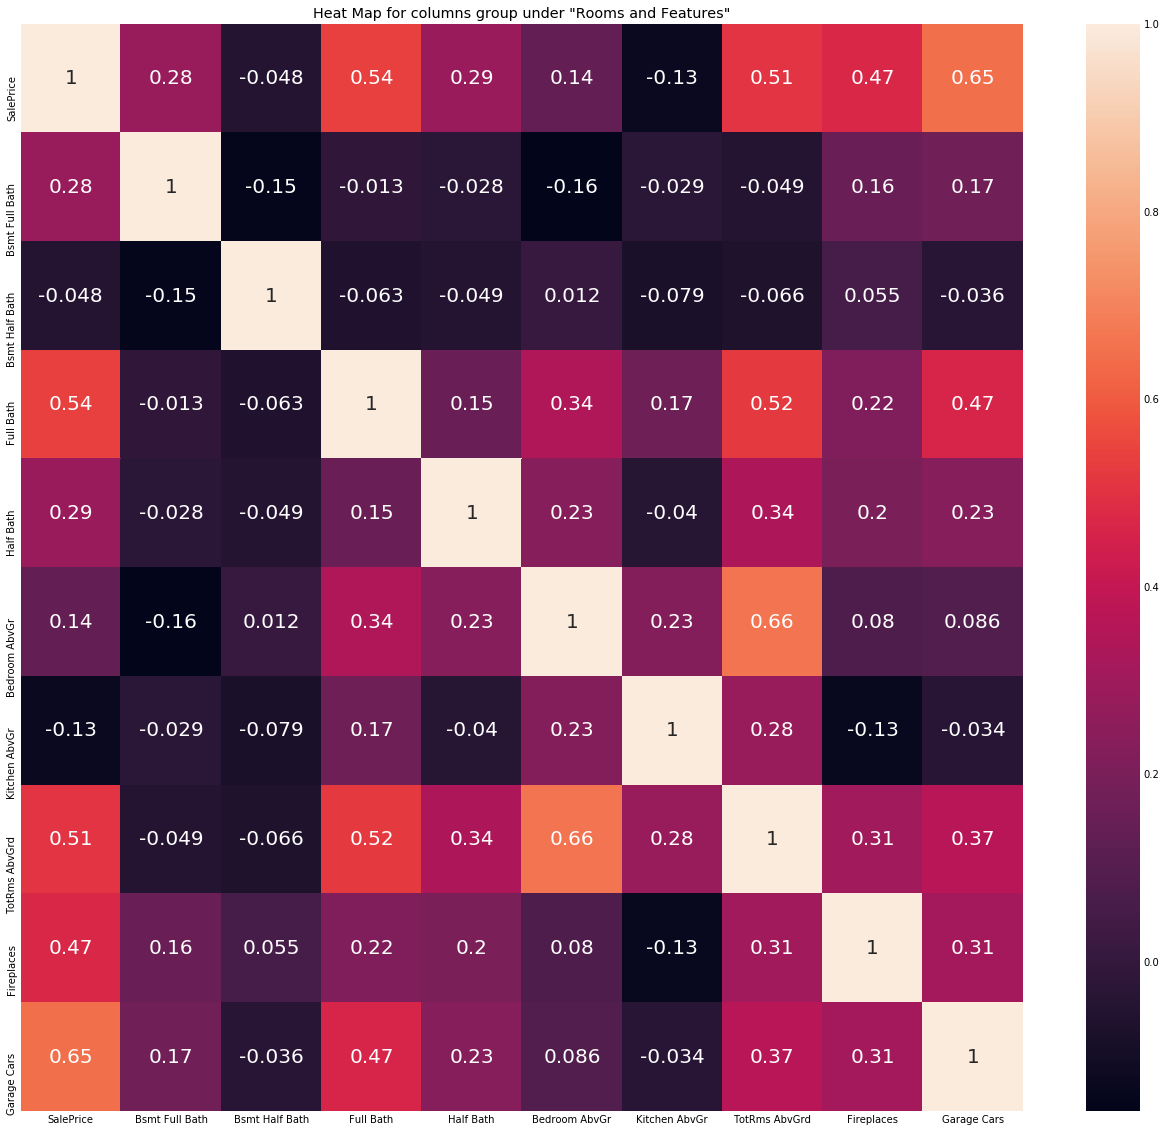

In [37]:
#to find out the general correlation between variables first, Rooms/Features
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Rooms and Features"')
sns.heatmap(ames_train[['SalePrice','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
                        'TotRms AbvGrd', 'Fireplaces', 'Garage Cars']].corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

#Use Full Bath, Total Rms Above Grd, Fireplaces, Garage Cars for poly features

In [38]:
rooms = ames_train[['Full Bath', 'TotRms AbvGrd','Fireplaces', 'Garage Cars']]
rooms.shape

(2046, 4)

In [39]:
rooms_poly = poly.fit_transform(rooms)
rooms_poly = pd.DataFrame(rooms_poly, columns = poly.get_feature_names(rooms.columns))

In [40]:
rooms_poly['SalePrice']=ames_train['SalePrice']

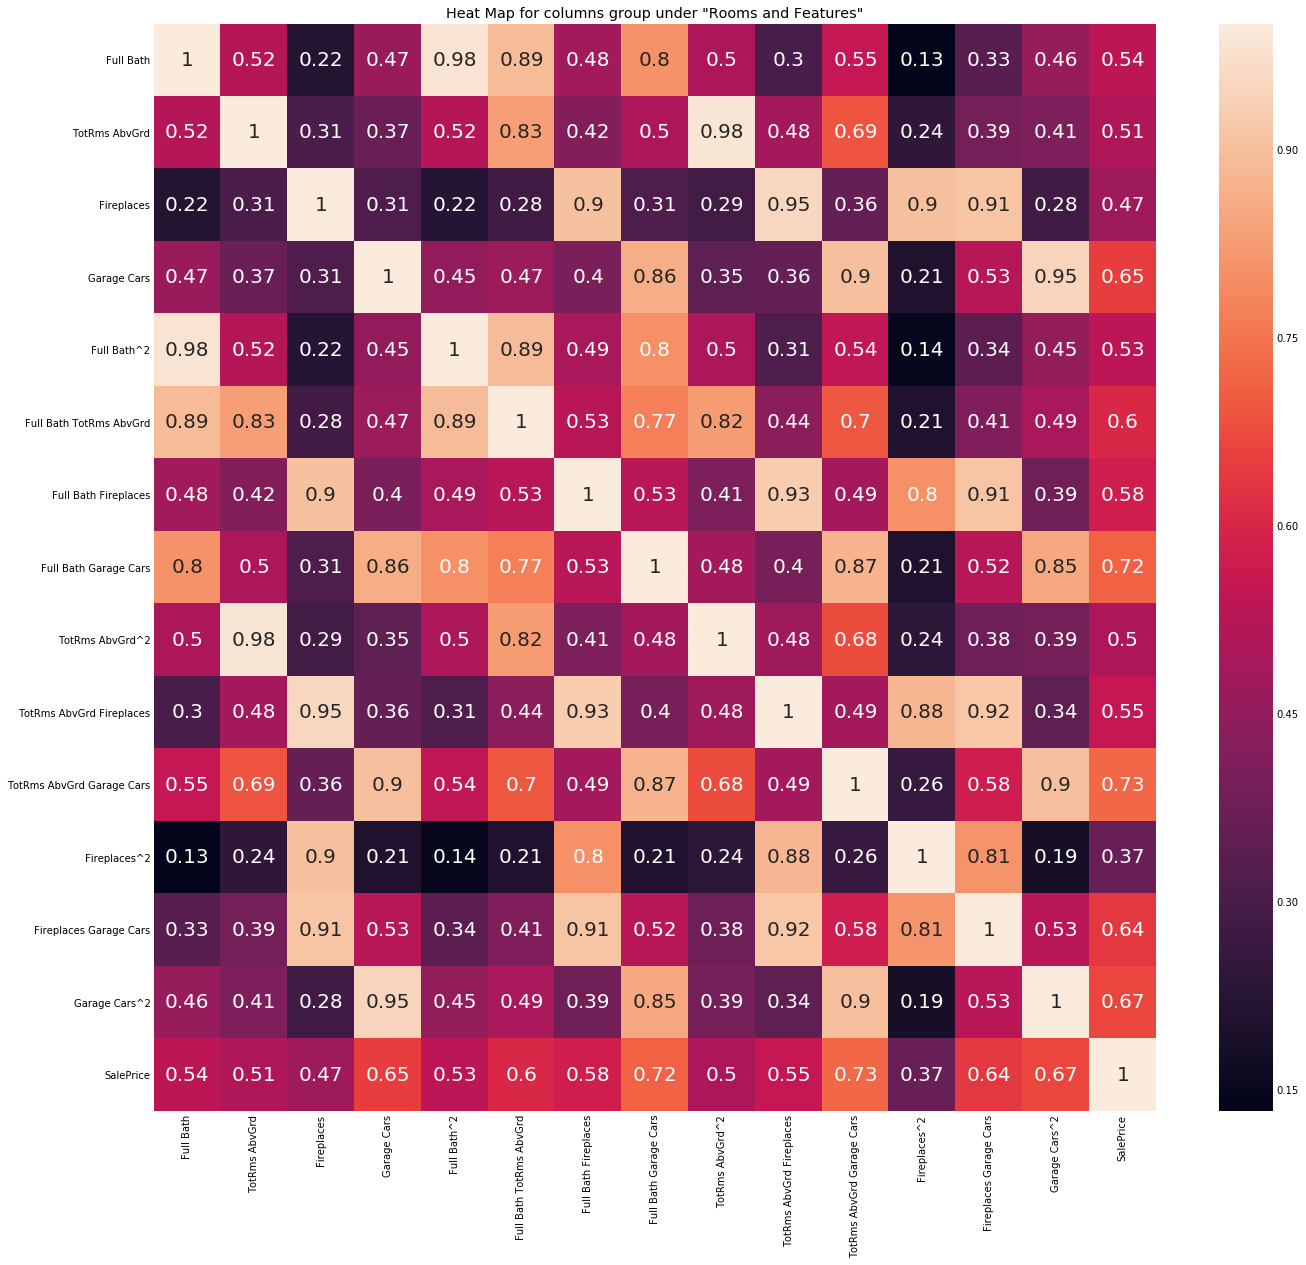

In [41]:
#check again if there are any additional features to add
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Rooms and Features"')
sns.heatmap(rooms_poly.corr(), ax = ax, annot=True, annot_kws={"size": 20})

#Include: 'Garage Cars^2', 'Full Bath Garage Car', 'TotRms AbvGrd Garage Car', 'Full Bath TotRms AbvGrd'

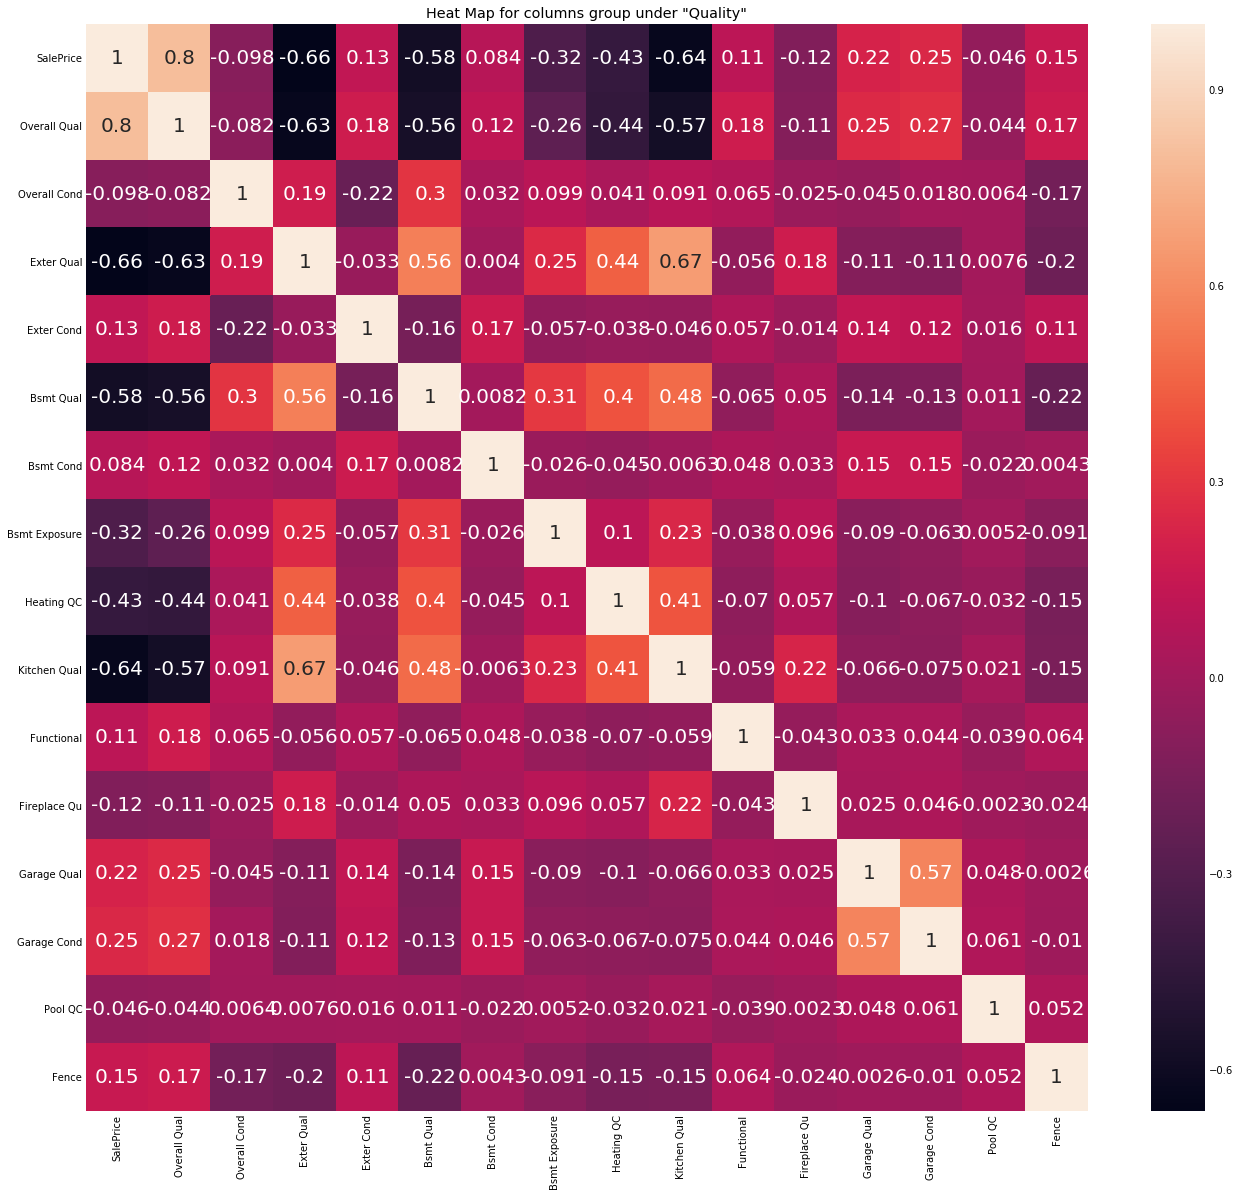

In [42]:
#to find out the general correlation between variables first, Quality
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Quality"')
sns.heatmap(ames_train[['SalePrice','Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
                        'Bsmt Exposure', 'Heating QC', 'Kitchen Qual','Functional','Fireplace Qu','Garage Qual','Garage Cond',
                       'Pool QC','Fence']].corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

#Include Overall Qual, Exter Qual, Bsmt Qual, Kitchen Qual

In [43]:
quality = ames_train[['Overall Qual', 'Exter Qual','Bsmt Qual', 'Kitchen Qual']]
quality.shape

(2046, 4)

In [44]:
quality_poly = poly.fit_transform(quality)
quality_poly = pd.DataFrame(quality_poly, columns = poly.get_feature_names(quality.columns))

In [45]:
quality_poly['SalePrice']=ames_train['SalePrice']

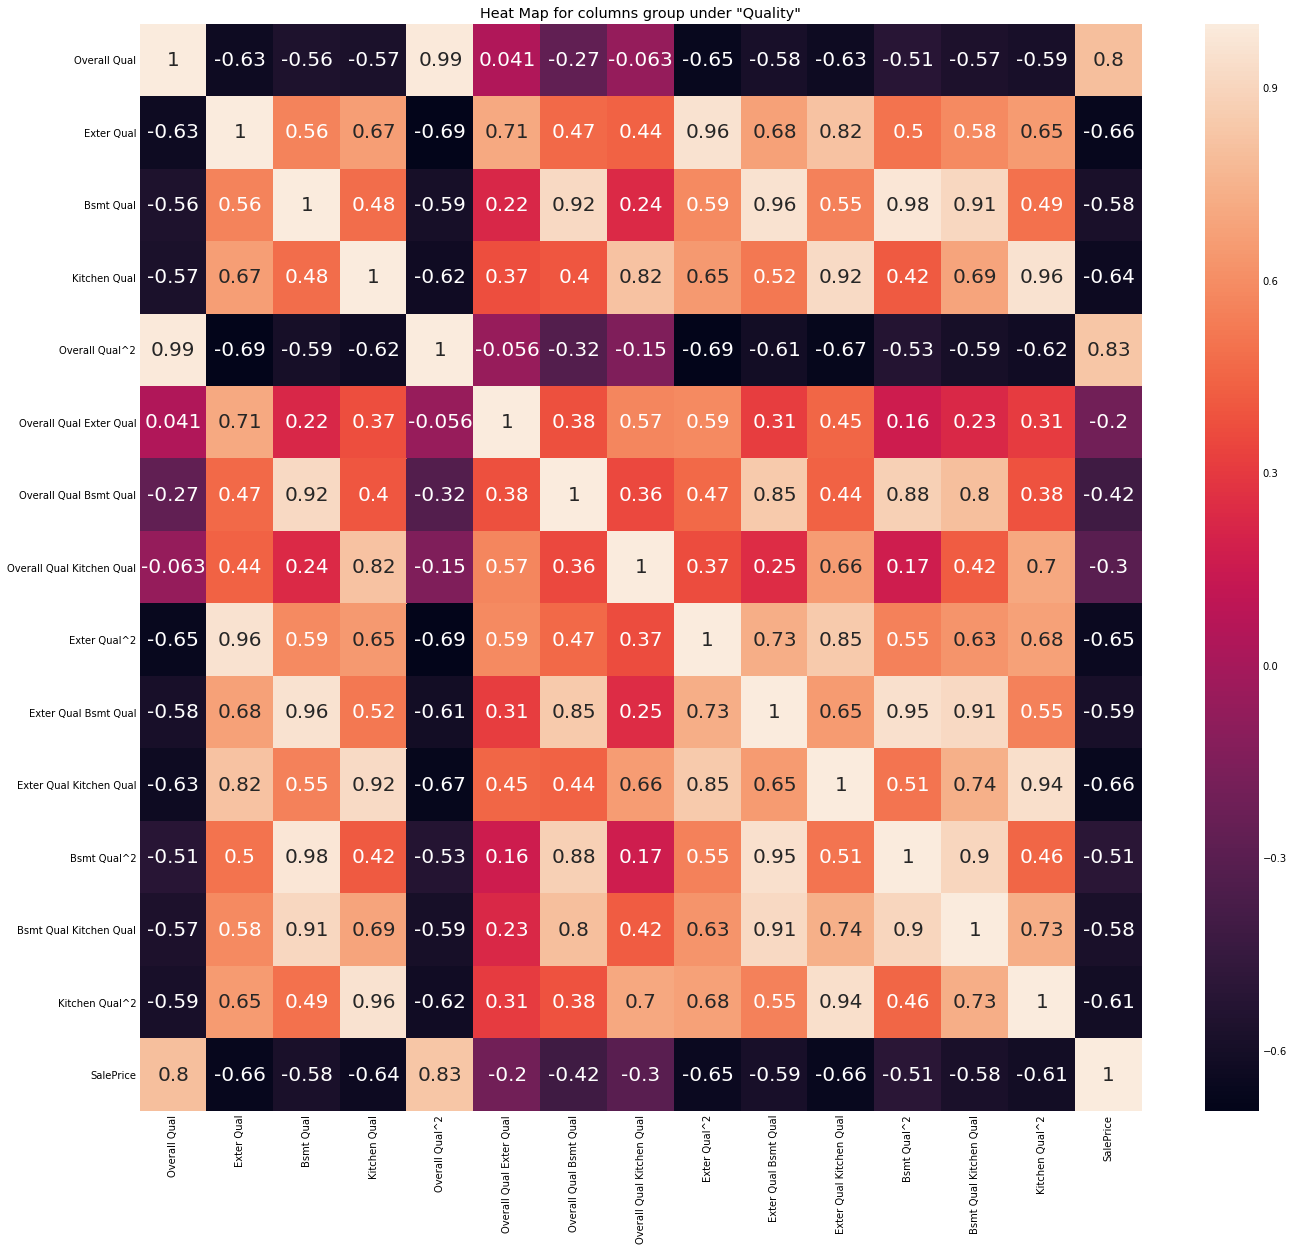

In [46]:
#check again if there are any additional features to add
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Quality"')
sns.heatmap(quality_poly.corr(), ax = ax, annot=True, annot_kws={"size": 20})

#Include: 'Overall Qual^2', Exter Qual, Bsmt Qual, Kitchen Qual

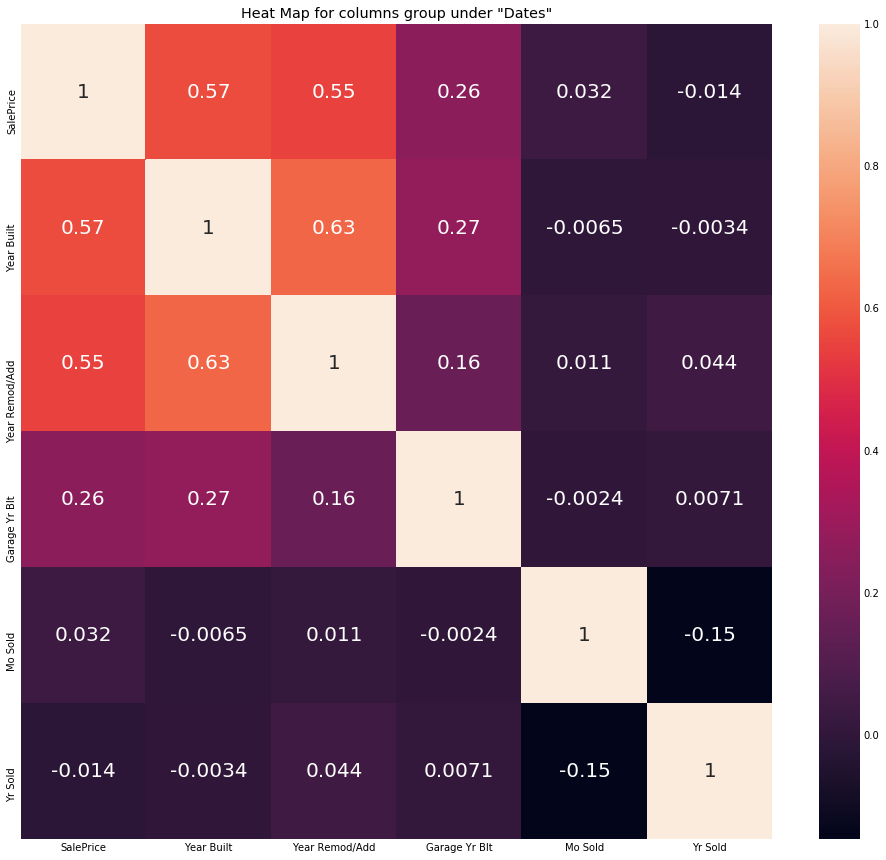

In [47]:
#to find out the general correlation between variables first, dates
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Heat Map for columns group under "Dates"')
sns.heatmap(ames_train[['SalePrice','Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']].corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

#Use 'Year Built', 'Year Remod/Add' for poly features 

In [48]:
dates = ames_train[['Year Built', 'Year Remod/Add']]
dates.shape

(2046, 2)

In [49]:
dates_poly = poly.fit_transform(dates)
dates_poly = pd.DataFrame(dates_poly, columns = poly.get_feature_names(dates.columns))

In [50]:
dates_poly['SalePrice']=ames_train['SalePrice']

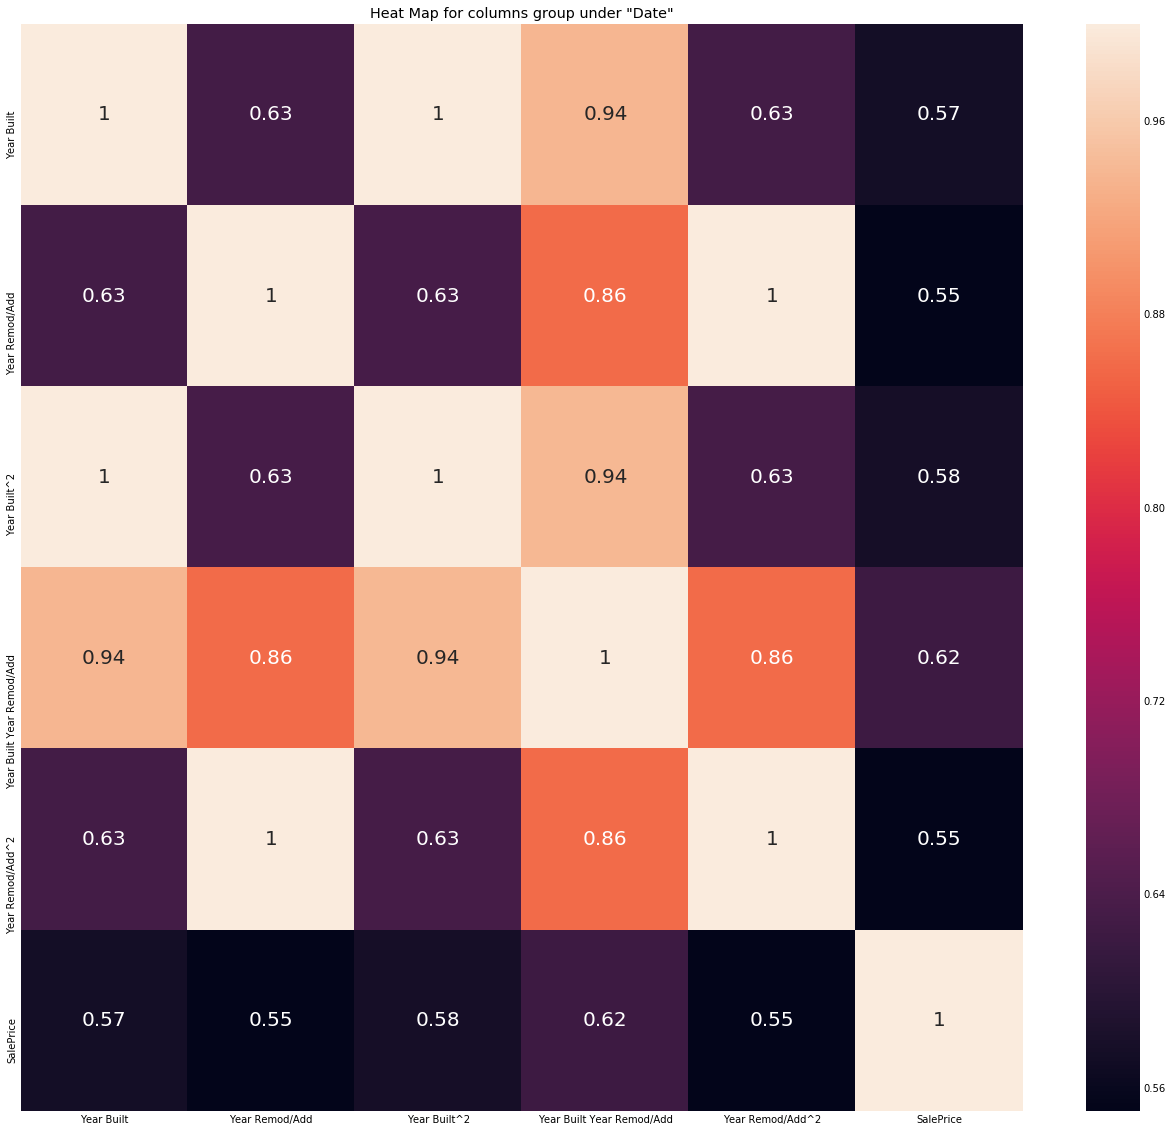

In [51]:
#check again if there are any additional features to add
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Date"')
sns.heatmap(dates_poly.corr(), ax = ax, annot=True, annot_kws={"size": 20})

#Include: 'Year Built Year Remod/Add'

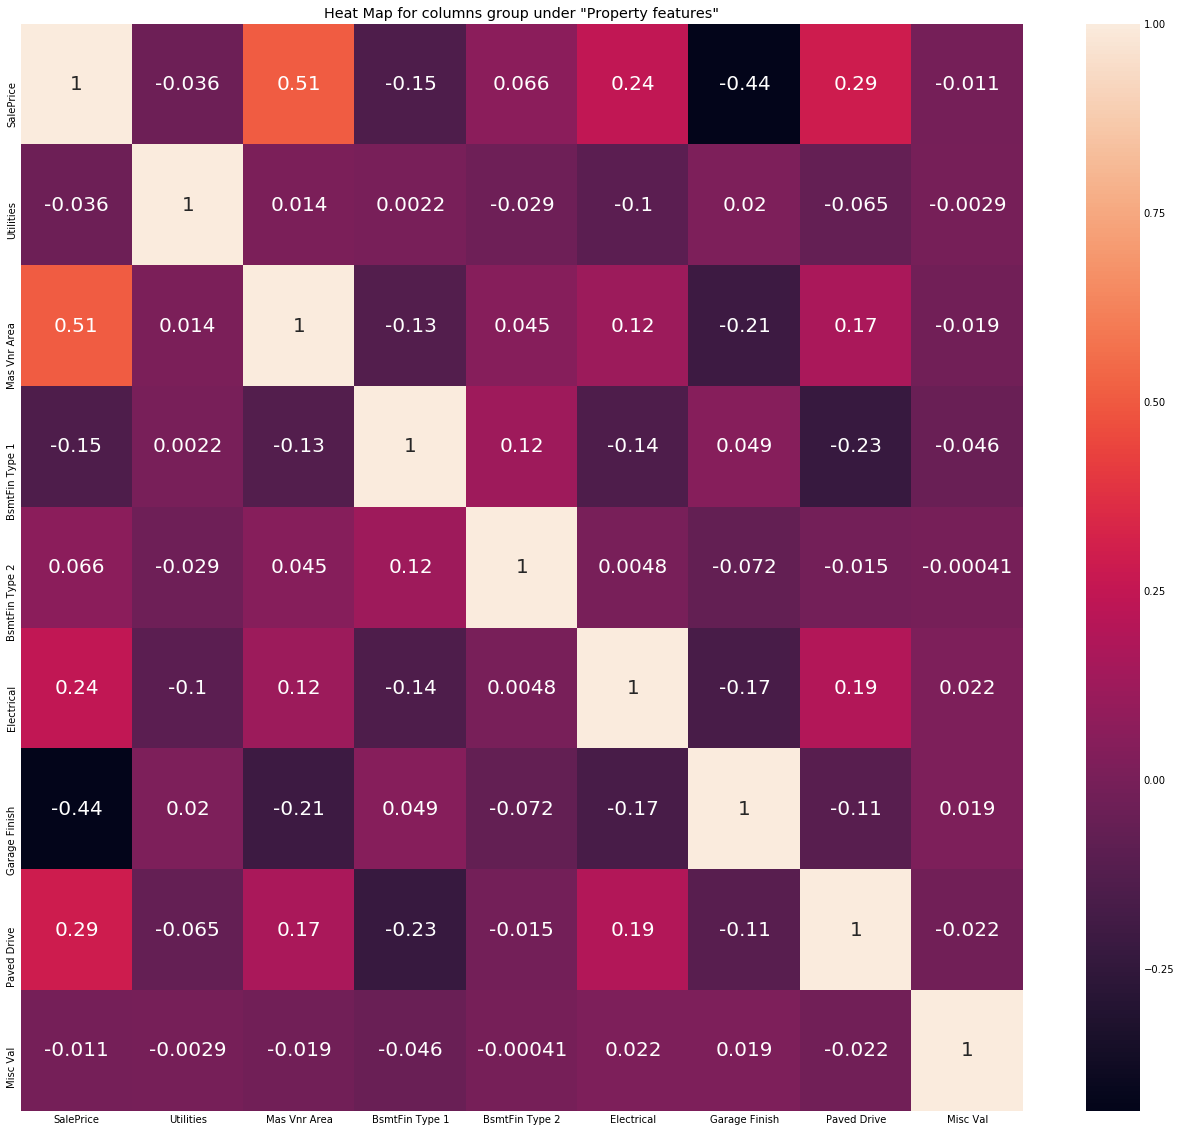

In [52]:
#to find out the general correlation between variables first, Property Features
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Property features"')
sns.heatmap(ames_train[['SalePrice','Utilities', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                        'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area','Foundation','BsmtFin Type 1','BsmtFin Type 2',
                        'Heating','Central Air','Electrical','Garage Type','Garage Finish','Paved Drive',
                       'Misc Feature','Misc Val']].corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

#Use 'Mas Vnr Area', 'Garage Finish' for poly features 

In [53]:
property_features = ames_train[['Mas Vnr Area', 'Garage Finish']]
property_features.shape

(2046, 2)

In [54]:
property_features_poly = poly.fit_transform(property_features)
property_features_poly = pd.DataFrame(property_features_poly, columns = poly.get_feature_names(property_features.columns))

In [55]:
property_features_poly['SalePrice']=ames_train['SalePrice']

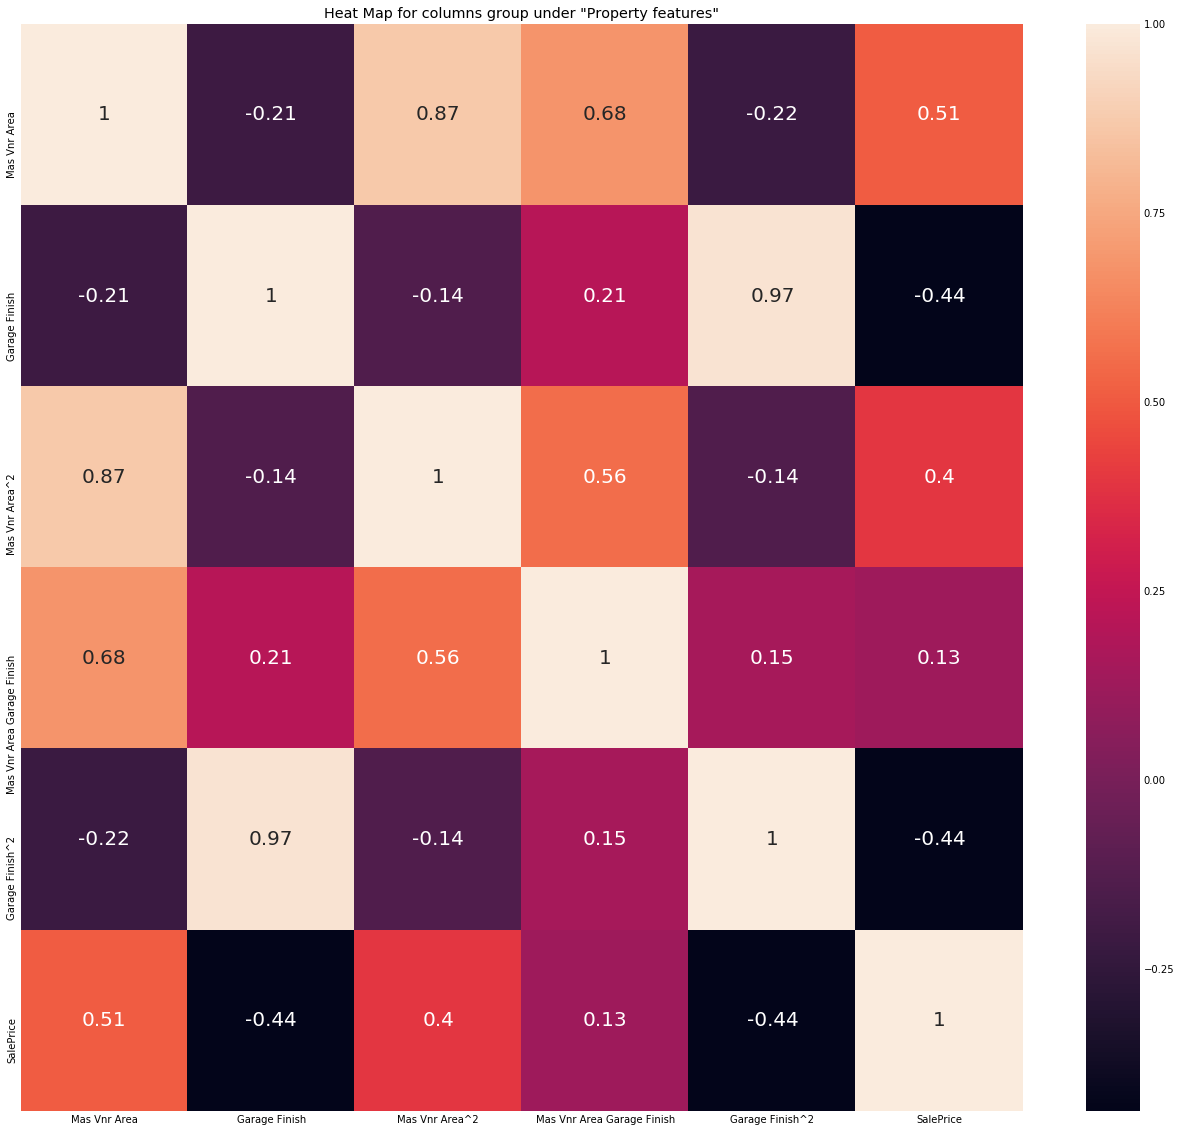

In [56]:
#check again if there are any additional features to add
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for columns group under "Property features"')
sns.heatmap(property_features_poly.corr(), ax = ax, annot=True, annot_kws={"size": 20})

#Drop all

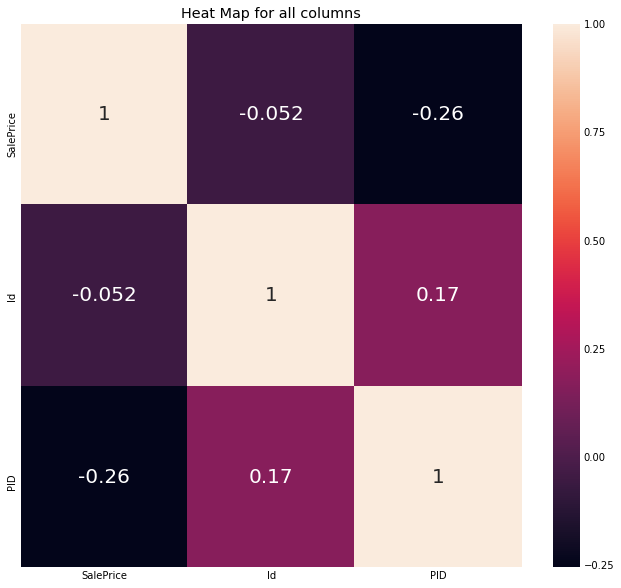

In [57]:
#to find out the general correlation between variables first, Others
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(ames_train[['SalePrice','Id', 'PID', 'Sale Type']].corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

#Drop all

In [58]:
area_final = area_poly[['Gr Liv Area','1st Flr SF Garage Area', 'Gr Liv Area Garage Area', 'Total Sq']]

rooms_final = rooms_poly[['Garage Cars^2', 'Full Bath Garage Cars', 'TotRms AbvGrd Garage Cars', 'Full Bath TotRms AbvGrd']]

quality_final = quality_poly[['Overall Qual^2', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual']]

dates_final = dates_poly[['Year Built Year Remod/Add']]

In [59]:
df2 = pd.concat([area_final,rooms_final,quality_final,dates_final],join = 'outer', axis=1)
df2 = pd.concat([df2,ames_train['SalePrice']],join = 'outer', axis=1)

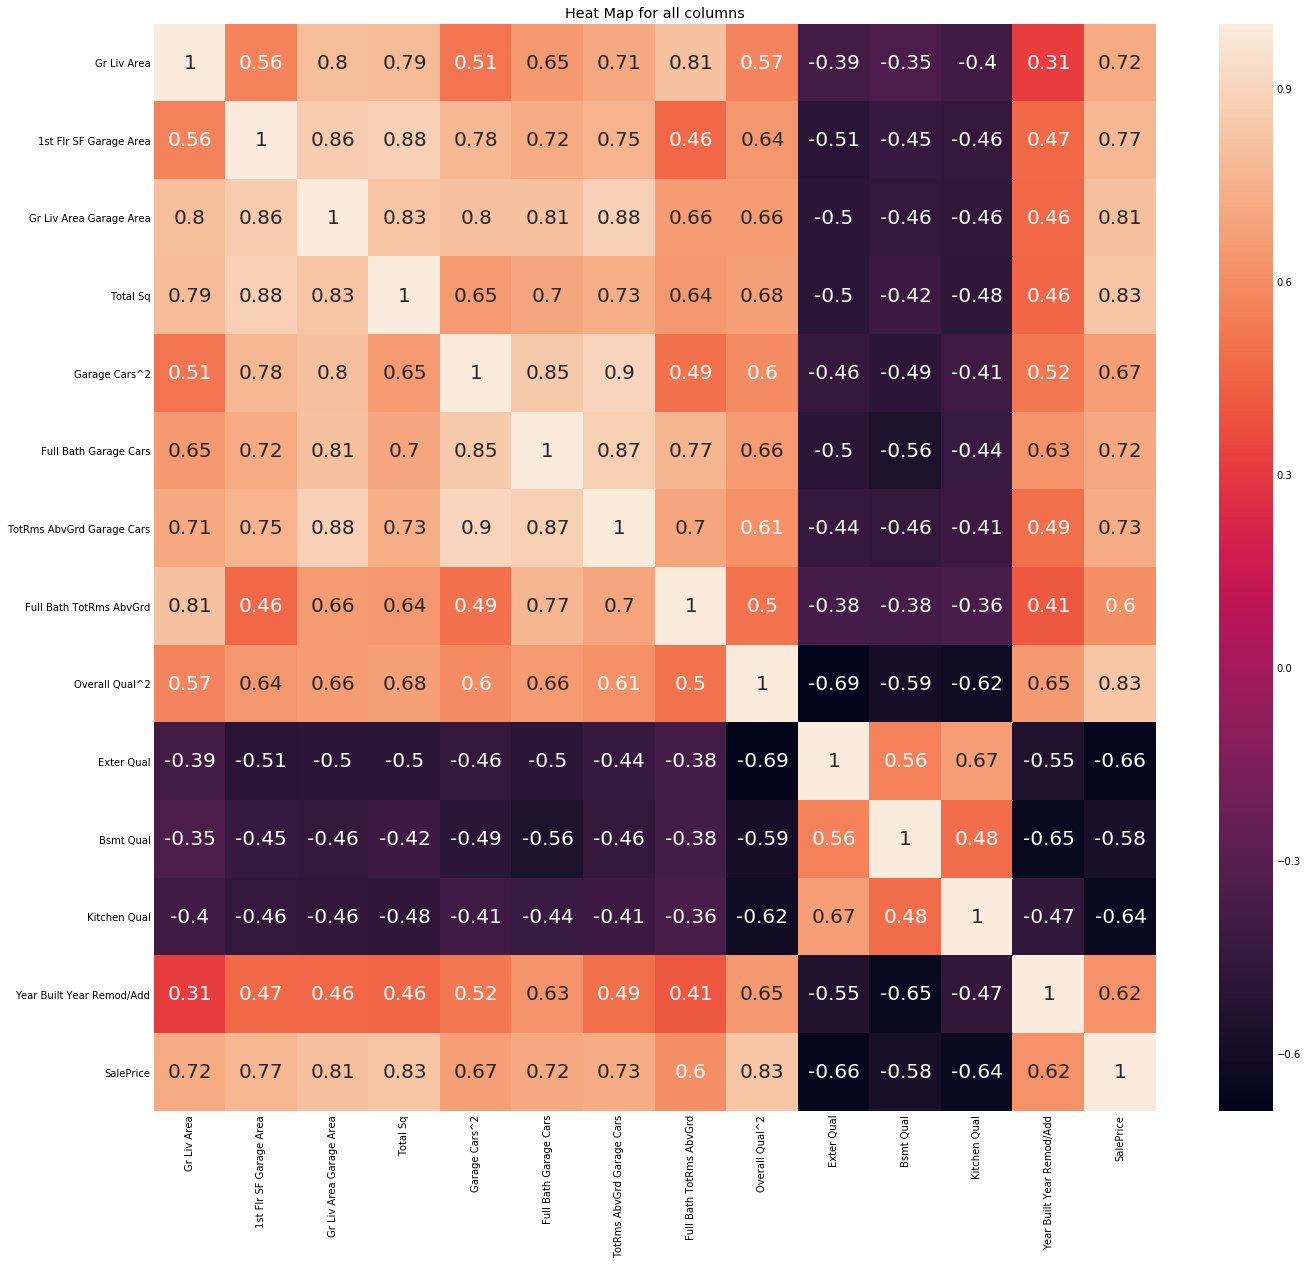

In [60]:
#to find out the general correlation between selected variables
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(df2.corr(), 
            ax = ax, annot=True, annot_kws={"size": 20})

In [61]:
df2[df2.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice                    1.000000
Total Sq                     0.833317
Overall Qual^2               0.831089
Gr Liv Area Garage Area      0.808271
1st Flr SF Garage Area       0.771606
TotRms AbvGrd Garage Cars    0.725514
Full Bath Garage Cars        0.715320
Garage Cars^2                0.665670
Year Built Year Remod/Add    0.623212
Full Bath TotRms AbvGrd      0.604500
Bsmt Qual                   -0.580100
Kitchen Qual                -0.636961
Exter Qual                  -0.663639
Name: SalePrice, dtype: float64

In [62]:
#Split df so that SalePrice is not included
#log the SalePrice to deduce the values
X = df2.iloc[:,:-1]
y = np.log(ames_train.SalePrice)

In [63]:
#Train,test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20 , train_size=0.7 , test_size=0.3)

In [64]:
ss = StandardScaler()

In [65]:
#Scale data after train,test split
#fit transform train data only
#only transform test data based on the parameters of training data

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [66]:
#Try using linear regression
linreg = LinearRegression()
model = linreg.fit(Xs_train,y_train)
linreg_scores = cross_val_score(model, X, y, cv=10)

print (linreg_scores)
print (np.mean(linreg_scores))

[0.77927375 0.82816378 0.86496304 0.90367844 0.86021375 0.87948517
 0.85694695 0.76328339 0.8793097  0.87957975]
0.8494897699926105


In [67]:
#Try Lasso
optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00045756596144657985


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [68]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X, y, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))
#improved by about 0.4% from linear regression

[0.77878147 0.82852754 0.86481108 0.903949   0.86015819 0.87945505
 0.85644081 0.7632329  0.87995193 0.87948182]
0.8494789787573203


In [69]:
lasso.fit(Xs_train, y_train)

Lasso(alpha=0.00045756596144657985, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
Xs_train=pd.DataFrame(Xs_train, columns = X_train.columns)

In [71]:
lasso_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
3,Total Sq,0.181918,0.181918
8,Overall Qual^2,0.131341,0.131341
12,Year Built Year Remod/Add,0.122684,0.122684
0,Gr Liv Area,0.060585,0.060585
6,TotRms AbvGrd Garage Cars,0.057472,0.057472
1,1st Flr SF Garage Area,-0.050457,0.050457
7,Full Bath TotRms AbvGrd,-0.048951,0.048951
4,Garage Cars^2,-0.026390,0.026390
2,Gr Liv Area Garage Area,0.022819,0.022819
9,Exter Qual,0.018102,0.018102


In [72]:
print(lasso_coefs.shape)
print(np.sum((lasso.coef_ == 0)))                                                          
print('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(lasso_coefs.shape[0]))
#Redo another model based on the variables that are not filtered out

(13, 3)
1
Percent variables zeroed out: 0.07692307692307693


In [73]:
lasso_coefs2 = lasso_coefs[:(13-1)]
lasso_coefs2 = lasso_coefs2.drop(['coef','abs_coef'], axis=1)
lasso_coefs2

,variable
3,Total Sq
8,Overall Qual^2
12,Year Built Year Remod/Add
0,Gr Liv Area
6,TotRms AbvGrd Garage Cars
1,1st Flr SF Garage Area
7,Full Bath TotRms AbvGrd
4,Garage Cars^2
2,Gr Liv Area Garage Area
9,Exter Qual


In [74]:
#Changing the revised model to keep only the necessary features
#Use X2 to test again
X2 = X[["Total Sq",
"Overall Qual^2",
"Year Built Year Remod/Add",
"Gr Liv Area",
"TotRms AbvGrd Garage Cars",
"1st Flr SF Garage Area",
"Full Bath TotRms AbvGrd",
"Garage Cars^2",
"Gr Liv Area Garage Area",
"Exter Qual",
"Kitchen Qual",
"Bsmt Qual"]]

In [75]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=20 , train_size=0.7 , test_size=0.3)

In [76]:
#Scale data after train,test split
#fit transform train data only
#only transform test data based on the parameters of training data

Xs_train2 = ss.fit_transform(X_train2)
Xs_test2 = ss.transform(X_test2)

In [77]:
#Redo linear regression
linreg = LinearRegression()
model2 = linreg.fit(Xs_train2,y_train2)
linreg_scores2 = cross_val_score(model2, X2, y, cv=10)

print (linreg_scores2)
print (np.mean(linreg_scores2))
#0.5% improvement compared to previous linear regression

[0.77946763 0.82857195 0.86484636 0.9039758  0.85983403 0.87978337
 0.85640796 0.76341392 0.87980546 0.87886203]
0.8494968517140593


In [78]:
#Try Lasso

optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)
optimal_lasso.fit(Xs_train2, y_train2)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0003352112414685707


..........................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


In [79]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X2, y, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))
#slightly worst than the new linear regression

[0.77905954 0.82875325 0.86473043 0.90410324 0.85984685 0.87970322
 0.85619784 0.76332507 0.88019557 0.87908151]
0.8494996522767199


In [80]:
lasso_model2 = lasso.fit(Xs_train2, y_train2)
lasso_model2

Lasso(alpha=0.0003352112414685707, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
Xs_train2=pd.DataFrame(Xs_train2, columns = X_train2.columns)

In [82]:
lasso_coefs = pd.DataFrame({'variable':Xs_train2.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head()

,variable,coef,abs_coef
0,Total Sq,0.184603,0.184603
1,Overall Qual^2,0.131518,0.131518
2,Year Built Year Remod/Add,0.123010,0.123010
4,TotRms AbvGrd Garage Cars,0.059288,0.059288
3,Gr Liv Area,0.058793,0.058793


In [83]:
print(lasso_coefs.shape)
print(np.sum((lasso.coef_ == 0)))                                                          
print('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(lasso_coefs.shape[0]))
#most variables has already been taken out, keep all these

(12, 3)
0
Percent variables zeroed out: 0.0


In [84]:
#Use ridge to test on with this new data
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs_train2, y_train2)

print(optimal_ridge.alpha_)

6.368249944718588


In [85]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))
#ridge has the best model at the moment, by 0.02%

[0.7792246  0.82821618 0.86494491 0.90371573 0.8602138  0.87947345
 0.85689724 0.7632875  0.87943998 0.87961937]
0.8495032763518247


In [86]:
#Use ElasticNet to test for optimal model
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(Xs_train2, y_train2)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)
#Almost full ridge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0003352112414685707
1.0


.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 

In [87]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X, y, cv=10)

print (enet_scores)
print (np.mean(enet_scores))
#worst off than individual models of ridge but slightly better than lasso, ditch this model

[0.77891735 0.82843566 0.86485932 0.90388191 0.86018403 0.8794665
 0.85658065 0.76325145 0.87978389 0.87951273]
0.8494873487421805


In [88]:
#Use Lasso as my final model
lasso_model = optimal_lasso.fit(Xs_train2, y_train2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [89]:
lasso_model.score(Xs_train2, y_train2)

0.8434120855590781

In [90]:
lasso_model.score(Xs_test2, y_test2)

0.8625614211052597

In [91]:
y_pred = lasso_model.predict(Xs_test2)

In [92]:
r2_score(y_test2, y_pred)

0.8625614211052597

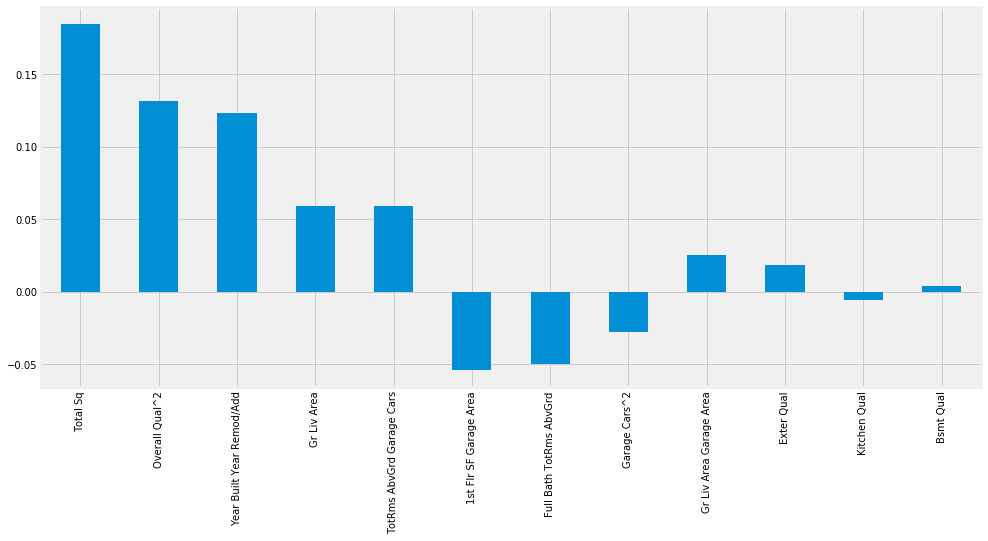

In [93]:
pd.Series(lasso_model.coef_, index=X2.columns).plot.bar(figsize=(15, 7))

In [94]:
#convert back to the normal price via e^i
y_pred2 = np.exp(lasso_model.predict(Xs_test2))
y_test2 = np.exp(y_test2)

In [95]:
residuals = y_test2 - y_pred2

In [96]:
ridge_mse = mean_squared_error(y_test2, y_pred2)
ridge_rmse = np.sqrt(ridge_mse)

print(ridge_mse)
print(ridge_rmse)

850702108.0588447
29166.798042617647


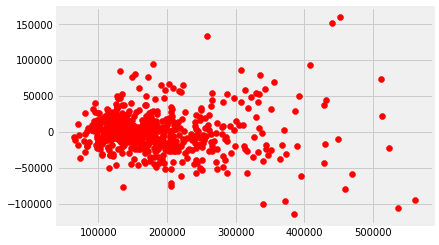

In [97]:
plt.scatter(y_pred2, residuals,color='red')

In [98]:
#loading test data
ames_test = pd.read_csv('datasets/test.csv')

In [99]:
#exploring and cleaning test dataset
explore(ames_test)

(879, 80)

     Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall 

In [100]:
LF_test= ames_test[~ames_test['Lot Frontage'].isnull()]
LF_null_test = ames_test[ames_test['Lot Frontage'].isnull()]
LF_null_test.shape

(160, 80)

In [101]:
linreg = LinearRegression()
X = LF_test['Lot Area']
X = X.values.reshape(-1, 1)
y = LF_test['Lot Frontage']

In [102]:
X_test = LF_null_test['Lot Area']
X_test = X_test.values.reshape(-1, 1)

In [103]:
model = linreg.fit(X,y)

In [104]:
y_pred_lf = model.predict(X_test)
y_pred_lf = pd.DataFrame(y_pred_lf, columns = ['Lot Frontage 2'])

In [105]:
LF_null_test = LF_null_test.reset_index(drop=True)
y_pred_lf3 = pd.concat([LF_null_test['Id'],y_pred_lf], axis=1,join ='outer')

In [106]:
ames_test = ames_test.merge(y_pred_lf3,on='Id',how='outer')

In [107]:
ames_test['Lot Frontage'] = ames_test[['Lot Frontage','Lot Frontage 2']].max(axis=1)

In [108]:
ames_test = ames_test.drop(['Lot Frontage 2'], axis = 1)

In [109]:
#Replacing the np.nan cells to their respective column values

#Changing to NA for no alley access
ames_test['Alley'] = ames_test['Alley'].replace({np.nan:'NA'})

#both 'Mas Vnr Type' and 'Mas Vnr Area' are 1 entry that are tied to each other
ames_test['Mas Vnr Type'] = ames_test['Mas Vnr Type'].replace({np.nan:'None'})
ames_test['Mas Vnr Area'] = ames_test['Mas Vnr Area'].replace({np.nan:0})

#25 entries without basement
ames_test['Bsmt Qual'] = ames_test['Bsmt Qual'].replace({np.nan:'NA'})
ames_test['Bsmt Cond'] = ames_test['Bsmt Cond'].replace({np.nan:'NA'})
ames_test['Bsmt Exposure'] = ames_test['Bsmt Exposure'].replace({np.nan:'NA'})
ames_test['BsmtFin Type 1'] = ames_test['BsmtFin Type 1'].replace({np.nan:'NA'})
ames_test['BsmtFin Type 2'] = ames_test['BsmtFin Type 2'].replace({np.nan:'NA'})

#1 electrical entry without additional information
ames_test.iloc[635, ames_test.columns.get_loc('Electrical')] = 'Mixed'

#All fireplace Qu with np.nan is does not have a fireplace,422 entries
ames_test['Fireplace Qu'] = ames_test['Fireplace Qu'].replace({np.nan:'NA'})

#All except for row765, does not have a garage. 44 entries without garage
ames_test['Garage Type'] = ames_test['Garage Type'].replace({np.nan:'NA'})
ames_test.iloc[765, ames_test.columns.get_loc('Garage Yr Blt')] = ames_test.iloc[765, ames_test.columns.get_loc('Year Built')]
ames_test['Garage Yr Blt'] = ames_test['Garage Yr Blt'].replace({np.nan:0})
ames_test['Garage Finish'] = ames_test['Garage Finish'].replace({np.nan:'NA'})
ames_test['Garage Qual'] = ames_test['Garage Qual'].replace({np.nan:'NA'})
ames_test['Garage Cond'] = ames_test['Garage Cond'].replace({np.nan:'NA'})


#All Pool QC with np.nan has pool area of 0
ames_test['Pool QC'] = ames_test['Pool QC'].replace({np.nan:'NA'})
ames_test['Fence'] = ames_test['Fence'].replace({np.nan:'NA'})
ames_test['Misc Feature'] = ames_test['Misc Feature'].replace({np.nan:'NA'})

In [110]:
def transform2(col):
    for i in col:
        le.fit(ames_test[i])
        list(le.classes_)
        ames_test[i] = le.transform(ames_test[i])

transform2(columns)

In [111]:
#recreating the features for test set
ames_test['Full Bath Garage Cars'] = ames_test['Full Bath'] * ames_test['Garage Cars']
ames_test['Garage Cars^2'] = ames_test['Garage Cars']**2
ames_test['Total Sq'] = ames_test['Total Bsmt SF']+ames_test['1st Flr SF']+ames_test['Gr Liv Area']+ames_test['Garage Area']
ames_test['Year Built Year Remod/Add'] = ames_test['Year Built'] * ames_test['Year Remod/Add']
ames_test['1st Flr SF Garage Area']= ames_test['1st Flr SF'] * ames_test['Garage Area']
ames_test['Overall Qual^2']= ames_test['Overall Qual']**2
ames_test['Gr Liv Area Garage Area']= ames_test['Gr Liv Area']*ames_test['Garage Area']
ames_test['TotRms AbvGrd Garage Cars']= ames_test['TotRms AbvGrd']*ames_test['Garage Cars']
ames_test['Full Bath TotRms AbvGrd']= ames_test['Full Bath']*ames_test['TotRms AbvGrd']

In [112]:
ames_test = ames_test.drop(ames_test[['MS Zoning',
                                      'Street',
                                      'Alley',
                                      'Land Contour',
                                      'Lot Config',
                                      'Neighborhood',
                                      'Condition 1',
                                      'Condition 2',
                                      'Bldg Type',
                                      'House Style',
                                      'Roof Style',
                                      'Roof Matl',
                                      'Exterior 1st',
                                      'Exterior 2nd',
                                      'Mas Vnr Type',
                                      'Foundation',
                                      'Heating',
                                      'Central Air',
                                      'Garage Type',
                                      'Misc Feature',
                                      'Sale Type']], axis = 1)

In [113]:
#Standarizing all other columns
ames_test_s = ss.fit_transform(ames_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [116]:
ames_test_s = pd.DataFrame(ames_test_s, columns = ames_test.columns)

In [117]:
X_test_final = ames_test_s[["Total Sq",
"Overall Qual^2",
"Year Built Year Remod/Add",
"Gr Liv Area",
"TotRms AbvGrd Garage Cars",
"1st Flr SF Garage Area",
"Full Bath TotRms AbvGrd",
"Garage Cars^2",
"Gr Liv Area Garage Area",
"Exter Qual",
"Kitchen Qual",
"Bsmt Qual"]]

In [118]:
y_pred3 = np.exp(lasso_model.predict(X_test_final))
y_pred3 = pd.DataFrame(y_pred3, columns = ['SalePrice'])

In [119]:
final = pd.concat([ames_test.iloc[:,0],y_pred3], axis=1)

In [120]:
final = final.sort_values(by=['Id'],ascending=True)
final

,Id,SalePrice
704,2,1.157421e+05
706,4,2.546951e+05
120,6,1.821581e+05
312,7,2.265674e+05
401,17,2.144490e+05
316,18,3.851858e+05
791,22,1.617219e+05
608,27,1.116620e+05
391,31,1.142446e+05
753,36,1.511883e+05


In [121]:
final.to_csv("datasets/final7.csv", index=False) 